In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1sCDgLFzHEzqnG2O0N64PqSzpPD4HNzKt"})   # The id of the file ratings file
downloaded.GetContentFile('test_ground_truth.json')        # The name of the file

downloaded = drive.CreateFile({'id':"19dlLFTQGBuIVzMt5XYU4pOnSE_KoyJbg"})   # The id of the file ratings file
downloaded.GetContentFile('ori_pqal.json')        # The name of the file

downloaded = drive.CreateFile({'id':"18vLJx5ZhkY7P_RDQtocKkxTQndxOODfe"})   # The id of the file ratings file
downloaded.GetContentFile('df.csv')        # The name of the file


downloaded = drive.CreateFile({'id':"1UHlmRXoB-iPkB51epmVxt7ybx_ZGSV-3"})   # The id of the file ratings file
downloaded.GetContentFile('Bruit_Dataframe.csv')        # The name of the file



In [ ]:
pip install mord

  Created wheel for mord: filename=mord-0.6-cp37-none-any.whl size=6007 sha256=b18b332791717a655fca0fe0475a33deb8af08c2e27a3584d29238ffcdbdd2f5
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import mord
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_json('ori_pqal.json', orient='index')
df_fulltext = pd.read_csv('df.csv').set_index('ID')

df = df.merge(df_fulltext,how='inner',left_index=True,right_index=True)[['QUESTION','full_txt','LONG_ANSWER']].rename(columns={'LONG_ANSWER':'answer','QUESTION':'question'})
df.to_json('data.json',orient='records')

In [ ]:
df.head()

,question,full_txt,answer
21645374,Do mitochondria play a role in remodelling lac...,Do mitochondria play a role in remodelling lac...,Results depicted mitochondrial dynamics in viv...
9488747,"Syncope during bathing in infants, a pediatric...",Les malaises du nourrisson sont frquents en pr...,"""Aquagenic maladies"" could be a pediatric form..."
17208539,Are the long-term results of the transanal pul...,Are the long-term results of the transanal pul...,Our long-term study showed significantly bette...
10808977,Can tailored interventions increase mammograph...,Telephone counseling and tailored print commun...,The effects of the intervention were most pron...
26037986,30-Day and 1-year mortality in emergency gener...,30-Day and 1-year mortality in emergency gener...,Emergency laparotomy carries a high rate of mo...


In [ ]:
df = pd.read_json('ori_pqal.json', orient='index')

df_fulltext = pd.read_csv('df.csv').set_index('ID')

df_bruit = pd.read_csv('Bruit_Dataframe.csv').set_index('ID')[['Question','Answer','full_txt']].fillna(' ').rename(columns={'Question':'QUESTION','Answer':'LONG_ANSWER'})

df = pd.concat([df.merge(df_fulltext,how='inner',left_index=True,right_index=True)[['QUESTION','full_txt','LONG_ANSWER']],df_bruit])

Indexes = df.index

df.head(10)

,QUESTION,full_txt,LONG_ANSWER
21645374,Do mitochondria play a role in remodelling lac...,Do mitochondria play a role in remodelling lac...,Results depicted mitochondrial dynamics in viv...
9488747,"Syncope during bathing in infants, a pediatric...",Les malaises du nourrisson sont frquents en pr...,"""Aquagenic maladies"" could be a pediatric form..."
17208539,Are the long-term results of the transanal pul...,Are the long-term results of the transanal pul...,Our long-term study showed significantly bette...
10808977,Can tailored interventions increase mammograph...,Telephone counseling and tailored print commun...,The effects of the intervention were most pron...
26037986,30-Day and 1-year mortality in emergency gener...,30-Day and 1-year mortality in emergency gener...,Emergency laparotomy carries a high rate of mo...
26852225,Is adjustment for reporting heterogeneity nece...,Background: Anchoring vignettes are brief text...,Sleep disorders are common in the general adul...
17113061,Do mutations causing low HDL-C promote increas...,Background Although observational data support...,Genetic variants identified in the present stu...
10966337,A short stay or 23-hour ward in a general and ...,Objective: We evaluated the usefulness of a sh...,This data demonstrates the robust nature of th...
18847643,Therapeutic anticoagulation in the trauma pati...,Purpose. Trauma patients who require therapeut...,Trauma patients have a significant complicatio...
18239988,Differentiation of nonalcoholic from alcoholic...,Differentiation of nonalcoholic from alcoholic...,Higher MCVs and AST/ALT ratios in ASH reflect ...


,text,id
21645374,Do mitochondria play a role in remodelling lac...,21645374
9488747,Les malaises du nourrisson sont frquents en pr...,9488747
17208539,Are the long-term results of the transanal pul...,17208539
10808977,Telephone counseling and tailored print commun...,10808977
26037986,30-Day and 1-year mortality in emergency gener...,26037986
...,...,...
33947378,Influence of hypertension and other risk facto...,33947378
33948486,Identifying and Analyzing Systems Failures: An...,33948486
33952211,From training to practice: a report of profess...,33952211
33954154,Mutational Analysis of a Familial Adenomatous ...,33954154


In [ ]:

df1 = df[['QUESTION','LONG_ANSWER']].rename(columns={'LONG_ANSWER':'answer','QUESTION':'question'})
df1['id'] = df1.index
df1= df1.drop_duplicates(['id'])
#df1.to_json('data.json',orient='records')

KeyError: ignored

In [ ]:
def Preprocessing(Text):

  #### The preparation for the NLP traitement: 
  
  # Get the stop words:
  stop_words = stopwords.words('english')+['figure','table']

  #initialize the tokenizer and the lemmatizer: 
  tokenizer = RegexpTokenizer(r'\w+')
  lemmatizer = WordNetLemmatizer()
  ps = PorterStemmer()
  
  #Supprision des ponctuations:
  symbols = "'!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n\t"
  
  #Tokanizations:
  text_tokens = tokenizer.tokenize(Text)
  Result = ''
  
  #Supprisions des stops words, les valeurs numériques et les mots composés moins de 2 lettres:
  for word in text_tokens:
    if ( ( not word.lower() in stop_words ) & ( len(word) > 2 ) & ( not word.isdigit()) & (not word in symbols)  ):
      
      Result += ' ' + ps.stem(lemmatizer.lemmatize(word.lower()))
      
  
  #Le resultat sous forme de String:
  return Result

In [ ]:
def Tf_Idf_Matrix(Data):

  tf_idf_vectorizer = TfidfVectorizer(ngram_range=(2,2),strip_accents = 'unicode')
  X = tf_idf_vectorizer.fit_transform(Data)
  df = pd.DataFrame.sparse.from_spmatrix(data=X,columns = tf_idf_vectorizer.get_feature_names())
  
  return df,tf_idf_vectorizer



In [ ]:
def resize_matrices(df_questions,df_articles):
  
  #get the only the words that exist in the question
  df_articles = df_articles.loc[:,df_articles.columns.isin(df_questions.columns)]
  df_questions = df_questions[df_articles.columns]
  return df_articles,df_questions


In [ ]:
def Document_Retrivier_tfidf(df_questions,df_articles,n=5):
  
  score = np.dot(df_question.values , df_articles.values.transpose())
  num_articles = score.shape[0]
  articles = []
  for i in range(num_articles):
    article = score[i,:]
    articles.append(list(article.argsort()[-n:][::-1]))
  return articles

In [ ]:
def Document_Retrivier_tfidf(df_questions,df_articles,n=5):
  
  score = normalize(np.dot(df_question.values , df_articles.values.transpose()))
  num_articles = score.shape[0]
  articles = []
  for i in range(num_articles):
    article = score[i,:]
    keys  = list(article.argsort()[-n:][::-1])
    values    = list(article[keys])
    zip_iterator = zip(keys, values)
    articles.append(dict(zip_iterator))
  return articles
    

In [ ]:
def Document_Retrivier_Baseline(df_questions,df_articles,thresholder = 0.7, gamma = 15):
  
  score = normalize(np.dot(df_question.values , df_articles.values.transpose()))
  num_articles = score.shape[0]
  articles = []
  
  for i in range(num_articles):
    article = score[i,:]
    values = np.array([])
    keys = np.array([])
    cpt = 0
    nb_artical = 0
    
    while(cpt < thresholder and nb_artical < gamma):
      arg = np.argmax(article)
      keys = np.append(keys,arg)
      values = np.append(values,article[arg])
      cpt +=article[arg]
      nb_artical +=1     
      article[arg]=0
    
    zip_iterator = zip(keys.astype(int), values)
    articles.append(dict(zip_iterator))

  return articles

In [ ]:
def normalize(score):
  
  sum_of_rows = score.sum(axis=1)
  normalized_score= score / sum_of_rows[:, np.newaxis]
  
  return np.nan_to_num(normalized_score)

In [ ]:
def model_reg_ordinal(X_train,y_train):
  reg = mord.OrdinalRidge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=100000, tol=0.001, solver='auto')
  reg.fit(X_train, y_train)
  return reg

In [ ]:
def get_position(keys_doc, id):
  i = 0
  for elm in keys_doc:
    if elm == id:
      return i
    i+=1
  return i



In [ ]:
def generate_train_data(df_question,df_full_txt,n=25):

  X = np.array([])
  Y = np.array([])
  docs = Document_Retrivier_tfidf(df_question,df_full_txt,n)
  id = 0
  for article in docs[0:710] :
    X = np.append(X,list(article.values()))
    Y = np.append(Y,get_position(article.keys(),id))
    id+=1
  
  return X.reshape(len(docs[0:710]),n),Y.astype(int)
     








In [ ]:
def adaptive(y_pred,score):
  result = []
  for i in range(len(y_pred)):
    number = int(y_pred[i])
    result.append(dict(list(score[i].items())[:number]))
  
  return result


In [ ]:
def Accuracy(y_pred,y_test):
  score = 0
  for i in range(len(y_pred)):
    if y_test[i] in y_pred[i].keys():
      score +=1
  
  return score / len(y_pred)
    





In [ ]:
def eval(df_questions,df_full_txt):
  x = list(range(1,11))
  y_test = range(711)
  y = []
  for n in x :
    y_pred = Document_Retrivier_tfidf(df_questions,df_full_txt,n=n)[:710]
    y.append(Accuracy(y_pred,y_test))
  return x,y


In [ ]:
def eval(df_questions,df_full_txt):
  x = list(range(1,11))
  y_test = range(711)
  y = []
  for n in x :
    y_pred = Document_Retrivier_Baseline(df_question,df_full_txt,thresholder=n/10,gamma=10)[:710]
    y.append(Accuracy(y_pred,y_test))
  return x,y

In [ ]:
df['Vect_Question'] = df['QUESTION'].apply(lambda x : Preprocessing(x))
df['Vect_full_txt']  = df['full_txt'].apply(lambda x :Preprocessing(x))

In [ ]:
df['Vect_Question'] = df['question'].apply(lambda x : Preprocessing(x))
df['Vect_full_txt']  = df['full_txt'].apply(lambda x :Preprocessing(x))

In [ ]:
list(df['Vect_full_txt'].head(1))

[' mitochondrion play role remodel lace plant leaf program cell death lord background program cell death pcd regul death cell within organ lace plant aponogeton madagascariensi produc perfor leaf pcd leaf plant consist latticework longitudin transvers vein enclos areol pcd occur cell center areol progress outward stop approxim five cell vasculatur role mitochondrion pcd recogn anim howev le studi pcd plant result follow paper elucid role mitochondri dynam development regul pcd vivo madagascariensi singl areol within window stage leaf pcd occur divid three area base progress pcd cell undergo pcd npcd cell earli stage pcd epcd cell late stage pcd lpcd window stage leaf stain mitochondri dye mitotrack red cmxro examin mitochondri dynam delin four categori base characterist includ distribut motil membran potenti tunel assay show fragment ndna gradient mitochondri stage chloroplast transvacuolar strand also examin use live cell imag possibl import mitochondri permeabl transit pore ptp forma

In [ ]:
df_question,tf_idf_question_vectorizer = Tf_Idf_Matrix(df.Vect_Question)

In [ ]:
df_full_txt,tf_idf_full_txt_vectorizer = Tf_Idf_Matrix(df.Vect_full_txt)

In [ ]:
df_full_txt,df_question = resize_matrices(df_question,df_full_txt)

In [ ]:
score = normalize(np.dot(df_question.values , df_full_txt.values.transpose()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
five_doc = Document_Retrivier_tfidf(df_question,df_full_txt,n=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
Accuracy(five_doc[:710],range(711))

0.8591549295774648

In [ ]:
x,y = eval(df_question[:710],df_full_txt[:710])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


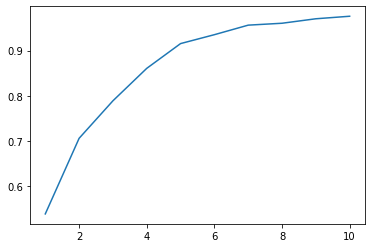

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(list(range(1,11)), y)

In [ ]:
Accuracy(baseline_doc[:710],range(711))

0.9211267605633803

In [ ]:
baseline_doc = Document_Retrivier_Baseline(df_question,df_full_txt,thresholder=0.7,gamma=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
score[500][500]

0.9167975348366469

In [ ]:
sum = 0
for elm in baseline_doc[0:711]:
  sum+=len(elm.keys())
sum/711

8.635724331926864

In [ ]:
X,y = generate_train_data(df_question,df_full_txt)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
reg = model_reg_ordinal(X,y)

In [ ]:
y_pred = (reg.predict(X_test) + 1).astype(int) 

In [ ]:
adaptive_model = adaptive(y_pred,five_doc[:710])

In [ ]:
Accuracy(adaptive_model,range(len(adaptive_model)))

0.8297872340425532